<a href="https://colab.research.google.com/github/youhavetoachiveeverything/my1strepo/blob/master/NIKHIL%3EPANDEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

***Imported the requrid libraries***

***Uploaded the Dataset***

In [139]:
# importing dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (2).csv


***dft is my training dataset name***

In [140]:
# reading dataset in frame
import io
dft = pd.read_csv(io.BytesIO(uploaded['train.csv']))

**showing fist 5 rows of dataset**

In [141]:
dft.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


**df is my Test dataset**
**Uploading test dataset here**

In [142]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv


In [143]:
import io
df = pd.read_csv(io.BytesIO(uploaded['test.csv']))

***showing fist 5 rows of dataset***

In [144]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,44.25,11.00,y,p,d,v,1.500,t,f,0,f,s,0,0,0
1,b,23.58,0.46,y,p,w,v,2.625,t,t,6,t,g,208,347,0
2,b,23.92,1.50,u,g,d,h,1.875,t,t,6,f,g,200,327,1
3,b,33.17,1.00,u,g,x,v,0.750,t,t,7,t,g,340,4071,1
4,b,48.33,12.00,u,g,m,v,16.000,t,f,0,f,s,110,0,1


***Data preprosessing starts here***

***dealing NULL vaues Here***

***continious feature Null values are replaced by MEAN strategy of IMPUTER***

In [145]:
# dealing with null values for continious features
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(dft[['A2']])
dft['A2']= imp_mean.transform(dft[['A2']]).ravel()
imp_mean.fit(dft[['A14']])
dft['A14']= imp_mean.transform(dft[['A14']]).ravel()
imp_mean.fit(df[['A2']])
df['A2']= imp_mean.transform(df[['A2']]).ravel()
imp_mean.fit(df[['A14']])
df['A14']= imp_mean.transform(df[['A14']]).ravel()

***categorical feature NULL value Is replaced by MOST FREQUENT strategy of IMPUTER***

In [146]:
# dealing with null values for categorical features
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(dft[['A1']])
dft['A1']= imp_mean.transform(dft[['A1']]).ravel()
imp_mean.fit(dft[['A4']])
dft['A4']= imp_mean.transform(dft[['A4']]).ravel()
imp_mean.fit(dft[['A5']])
dft['A5']= imp_mean.transform(dft[['A5']]).ravel()
imp_mean.fit(dft[['A6']])
dft['A6']= imp_mean.transform(dft[['A6']]).ravel()
imp_mean.fit(dft[['A7']])
dft['A7']= imp_mean.transform(dft[['A7']]).ravel()
imp_mean.fit(df[['A1']])
df['A1']= imp_mean.transform(df[['A1']]).ravel()
imp_mean.fit(df[['A4']])
df['A4']= imp_mean.transform(df[['A4']]).ravel()
imp_mean.fit(df[['A5']])
df['A5']= imp_mean.transform(df[['A5']]).ravel()
imp_mean.fit(df[['A6']])
df['A6']= imp_mean.transform(df[['A6']]).ravel()
imp_mean.fit(df[['A7']])
df['A7']= imp_mean.transform(df[['A7']]).ravel()

*** we can see there is no NULL value IN dataset***

In [147]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


***Now have to Deal with encoding of categorical variables***

In [148]:
dft.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


***Using lebal encoder for encoding***

In [149]:
# incoding dataset useing lebel incoder
labelencoder = LabelEncoder()
dft.A1=labelencoder.fit_transform(dft.A1.values)
dft.A4=labelencoder.fit_transform(dft.A4.values)
dft.A5=labelencoder.fit_transform(dft.A5.values)
dft.A6=labelencoder.fit_transform(dft.A6.values)
dft.A7=labelencoder.fit_transform(dft.A7.values)
dft.A9=labelencoder.fit_transform(dft.A9.values)
dft.A10=labelencoder.fit_transform(dft.A10.values)
dft.A13=labelencoder.fit_transform(dft.A13.values)
dft.A12=labelencoder.fit_transform(dft.A12.values)
df.A1=labelencoder.fit_transform(df.A1.values)
df.A4=labelencoder.fit_transform(df.A4.values)
df.A5=labelencoder.fit_transform(df.A5.values)
df.A6=labelencoder.fit_transform(df.A6.values)
df.A7=labelencoder.fit_transform(df.A7.values)
df.A9=labelencoder.fit_transform(df.A9.values)
df.A10=labelencoder.fit_transform(df.A10.values)
df.A13=labelencoder.fit_transform(df.A13.values)
df.A12=labelencoder.fit_transform(df.A12.values)

***encoding sussesfull as can see***

In [150]:
dft.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.250,1,1,1,0,0,202.0,0,1
1,0,58.67,4.460,1,0,10,3,3.040,1,1,6,0,0,43.0,560,1
2,0,24.50,0.500,1,0,10,3,1.500,1,0,0,0,0,280.0,824,1
3,1,27.83,1.540,1,0,12,7,3.750,1,1,5,1,0,100.0,3,1
4,1,20.17,5.625,1,0,12,7,1.710,1,0,0,0,2,120.0,0,1
5,1,32.08,4.000,1,0,9,7,2.500,1,0,0,1,0,360.0,0,1
6,1,33.17,1.040,1,0,11,3,6.500,1,0,0,1,0,164.0,31285,1
7,0,22.92,11.585,1,0,2,7,0.040,1,0,0,0,0,80.0,1349,1
8,1,54.42,0.500,2,2,8,3,3.960,1,0,0,0,0,180.0,314,1
9,1,42.50,4.915,2,2,12,7,3.165,1,0,0,1,0,52.0,1442,1


***working for corellation between features***

In [151]:
dft['A5'].value_counts()

0    525
2    163
1      2
Name: A5, dtype: int64

In [152]:
dft['A4'].value_counts()

1    525
2    163
0      2
Name: A4, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


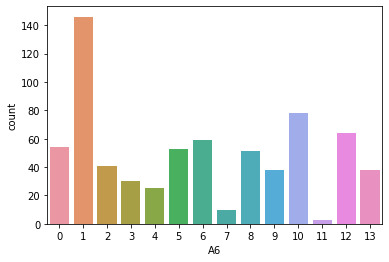

In [153]:
sns.countplot(dft['A6'],label="count")

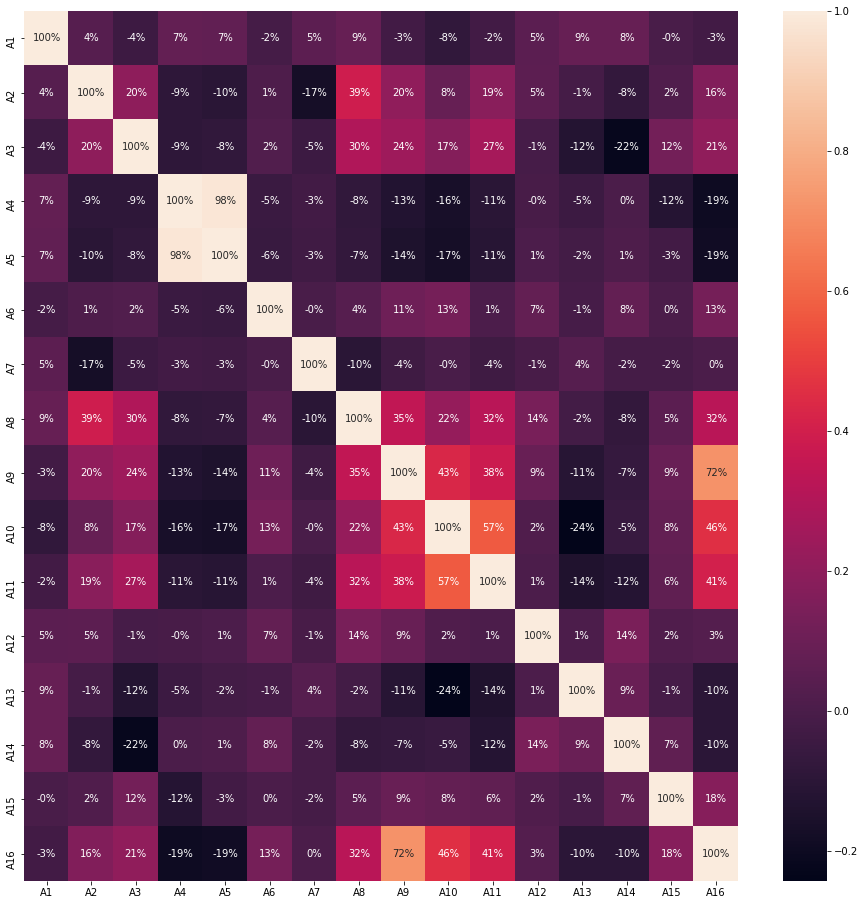

In [154]:
plt.figure(figsize=(16,16))
sns.heatmap(dft.iloc[:,0:16].corr(),annot=True,fmt=".0%")

***heat map shows that A4 and A5 are stronly corellated*** *** so better drop one of these***

In [155]:
list_drop = ['A5']
dft.drop(list_drop, axis=1, inplace=True)
df.drop(list_drop, axis=1, inplace=True)

***A5 has been dropped succesfully***

In [156]:
dft.head()

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,12,7,1.25,1,1,1,0,0,202.0,0,1
1,0,58.67,4.460,1,10,3,3.04,1,1,6,0,0,43.0,560,1
2,0,24.50,0.500,1,10,3,1.50,1,0,0,0,0,280.0,824,1
3,1,27.83,1.540,1,12,7,3.75,1,1,5,1,0,100.0,3,1
4,1,20.17,5.625,1,12,7,1.71,1,0,0,0,2,120.0,0,1


In [157]:
df.head()

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,44.25,11.00,1,3,5,1.500,1,0,0,0,1,0.0,0,0
1,1,23.58,0.46,1,11,5,2.625,1,1,6,1,0,208.0,347,0
2,1,23.92,1.50,0,3,2,1.875,1,1,6,0,0,200.0,327,1
3,1,33.17,1.00,0,12,5,0.750,1,1,7,1,0,340.0,4071,1
4,1,48.33,12.00,0,8,5,16.000,1,0,0,0,1,110.0,0,1


sns.boxplot(x=dft['A15'])

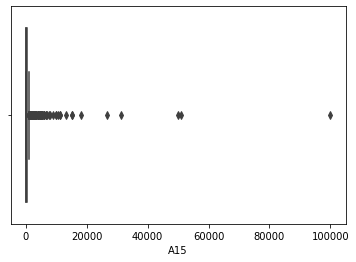

In [158]:
sns.boxplot(x=dft['A15'])

few outliers are there but cango with it

***Breaking the code in 4 parts as dependent andd independent features***

In [159]:
# breaking data
X_train=dft.iloc[ : , 0:14]
Y_train=dft.iloc[ : , 14:]
X_test=df.iloc[ : , 0:14]
Y_test=df.iloc[ : , 14:]


In [160]:
X_test.head(10)

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,44.25,11.000,1,3,5,1.500,1,0,0,0,1,0.0,0
1,1,23.58,0.460,1,11,5,2.625,1,1,6,1,0,208.0,347
2,1,23.92,1.500,0,3,2,1.875,1,1,6,0,0,200.0,327
3,1,33.17,1.000,0,12,5,0.750,1,1,7,1,0,340.0,4071
4,1,48.33,12.000,0,8,5,16.000,1,0,0,0,1,110.0,0
5,1,76.75,22.290,0,4,6,12.750,1,1,1,1,0,0.0,109
6,1,51.33,10.000,0,6,0,0.000,1,1,11,0,0,0.0,1249
7,1,34.75,15.000,0,10,4,5.375,1,1,9,1,0,0.0,134
8,1,38.58,3.335,0,11,5,4.000,1,1,14,0,0,383.0,1344
9,0,22.42,11.250,1,12,2,0.750,1,1,4,0,0,0.0,321


***Sccaling the training dataset Here***

In [161]:
# scaling the datset
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

***Model building starts here***  ***using 1 functions and 3 algorithms for accuracy comparision***

In [162]:
# building models
def models(X_train,Y_train):
        #logistic regression
        from sklearn.linear_model import LogisticRegression
        log=LogisticRegression(random_state=0)
        log.fit(X_train,Y_train)
        
        
        #Decision Tree
        from sklearn.tree import DecisionTreeClassifier
        tree=DecisionTreeClassifier(random_state=0,criterion="entropy")
        tree.fit(X_train,Y_train)
        
        #Random Forest
        from sklearn.ensemble import RandomForestClassifier
        forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
        forest.fit(X_train,Y_train)
        
        print('[0]logistic regression accuracy:',log.score(X_train,Y_train))
        print('[1]Decision tree accuracy:',tree.score(X_train,Y_train))
        print('[2]Random forest accuracy:',forest.score(X_train,Y_train))
        
        return log,tree,forest

***compiling above model with train dataset***

In [163]:
# compiling model
model=models(X_train,Y_train.values.ravel())

[0]logistic regression accuracy: 0.8710144927536232
[1]Decision tree accuracy: 1.0
[2]Random forest accuracy: 0.9884057971014493


***compiling model and getting accuracy for twst dataset***

In [164]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(Y_test.values.ravel(),model[i].predict(X_test)))
    print('Accuracy : ',accuracy_score(Y_test.values.ravel(),model[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        82
           1       0.91      0.89      0.90        54

    accuracy                           0.92       136
   macro avg       0.92      0.91      0.92       136
weighted avg       0.92      0.92      0.92       136

Accuracy :  0.9191176470588235
Model 1
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        82
           1       0.92      0.87      0.90        54

    accuracy                           0.92       136
   macro avg       0.92      0.91      0.91       136
weighted avg       0.92      0.92      0.92       136

Accuracy :  0.9191176470588235
Model 2
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        82
           1       1.00      0.89      0.94        54

    accuracy                           0.96       136
   macro avg       0.97      0.94      0.9

***accuracy, precision,f1-score above***



***predicted value for random forest***

In [165]:
# prediction of random-forest
pred=model[2].predict(X_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(Y_test.values.ravel())

Predicted values:
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual values:
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Now applying neural network


In [166]:
dft.head()

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,12,7,1.25,1,1,1,0,0,202.0,0,1
1,0,58.67,4.460,1,10,3,3.04,1,1,6,0,0,43.0,560,1
2,0,24.50,0.500,1,10,3,1.50,1,0,0,0,0,280.0,824,1
3,1,27.83,1.540,1,12,7,3.75,1,1,5,1,0,100.0,3,1
4,1,20.17,5.625,1,12,7,1.71,1,0,0,0,2,120.0,0,1


***importing tenserflow,keras*** 

In [167]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

***building a sequential NN densely connected***

In [168]:
classifier=Sequential()
classifier.add(Dense(8,kernel_initializer='he_uniform',activation='relu',input_dim=14))
classifier.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

***compiling the model with adam optimizer with batch size 10 upto 100 epochs***

In [169]:
classifier.compile(optimizer='adam',loss='binary_crossentropy')

***running model on dataset***

In [170]:
classifier.fit(X_train,Y_train,batch_size=10,epochs=100)

Epoch 1/100
69/69 [==============================] - 1s 1ms/step - loss: 0.8964
Epoch 2/100
69/69 [==============================] - 0s 1ms/step - loss: 0.6915
Epoch 3/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5947
Epoch 4/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5242
Epoch 5/100
69/69 [==============================] - 0s 1ms/step - loss: 0.5209
Epoch 6/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4791
Epoch 7/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4228
Epoch 8/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4343
Epoch 9/100
69/69 [==============================] - 0s 1ms/step - loss: 0.4180
Epoch 10/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3938
Epoch 11/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3850
Epoch 12/100
69/69 [==============================] - 0s 1ms/step - loss: 0.3397
Epoch 13/100
69/69 [=================

***predicting value for test dataset with thresold of 0.5***

In [171]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

***using confusion matrix for performence***

In [172]:
from sklearn.metrics import confusion_matrix
cum=confusion_matrix(Y_test,y_pred)
cum

array([[79,  3],
       [ 6, 48]])

In [173]:
Y_test.shape

(136, 1)

***by applyting formula can see accuracy***

In [174]:
accuracy=((79+48)/136)
accuracy

0.9338235294117647